In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# !pip install matplotlib
# !pip install numpy

In [4]:
image = cv2.imread("./majestic-lion-roaring-stockcake.jpg")

In [5]:
image is None

False

In [6]:
cv2.imshow("Color Thresholding",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

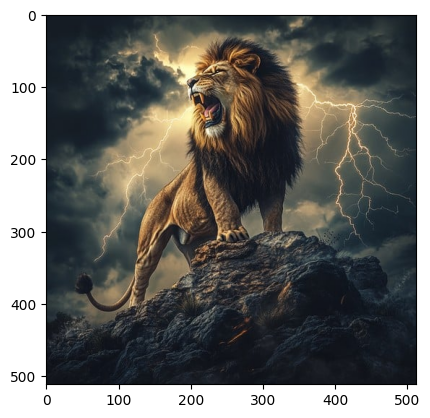

In [16]:
plt.imshow(image_rgb)

- Decide a target color and see the hsv color space range and target it
###### https://colorizer.org/

In [ ]:
# Mytarget== lightning
#  Keeep in mind that cv2 uses 0-255, 0-179

In [44]:
lower_bound=np.array([49,52,63])
upper_bound=np.array([180,93,83])

In [45]:
mask = cv2.inRange(image_hsv, lower_bound, upper_bound)

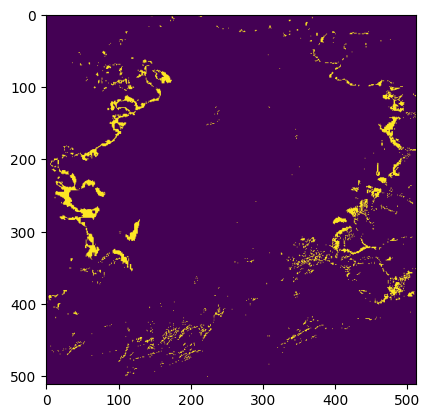

In [46]:
plt.imshow(mask)

In [47]:
red_hsv = np.uint8([[[180, 255, 73]]])
red_bgr = cv2.cvtColor(red_hsv, cv2.COLOR_HSV2BGR)[0][0]
red_rgb= cv2.cvtColor(red_hsv, cv2.COLOR_HSV2RGB)[0][0]

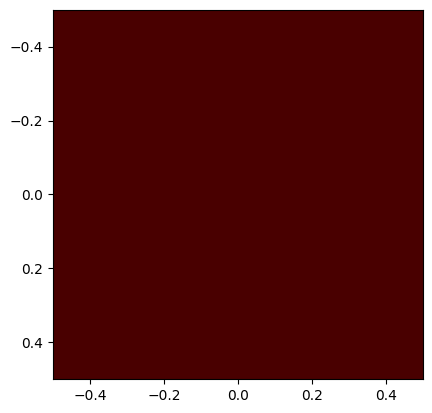

In [48]:
plt.imshow(cv2.cvtColor(red_hsv, cv2.COLOR_HSV2RGB))

In [49]:
image_result = image.copy()
image_result[mask>0] = red_bgr

In [50]:
image_result_rgb = cv2.cvtColor(image_result, cv2.COLOR_BGR2RGB)

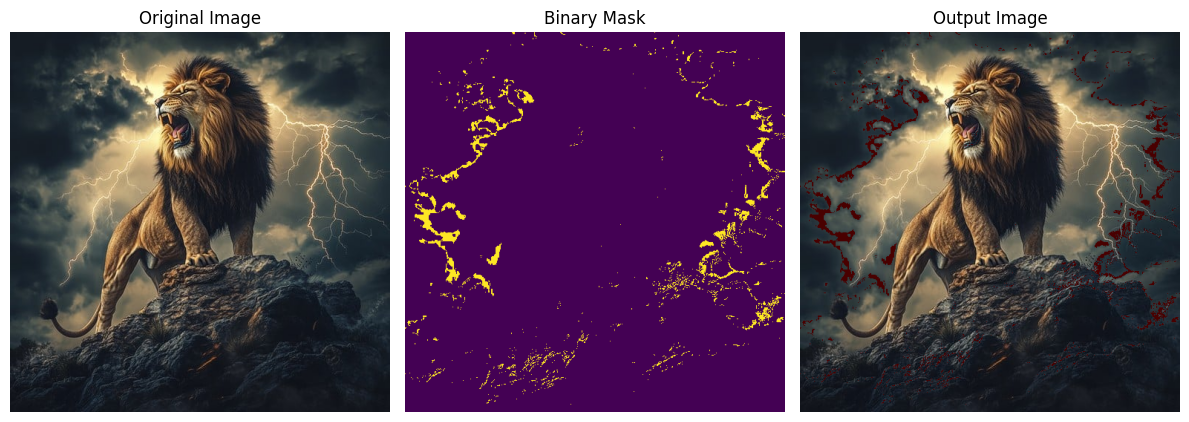

In [51]:
# PLOT

fig, axs = plt.subplots(1,3, figsize=(12,6))

axs[0].imshow(image_rgb)
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(mask)
axs[1].set_title("Binary Mask")   #Althoug mask is black and white but matplotlib uses purple and yellow type color for 0 and 1
axs[1].axis('off')


axs[2].imshow(image_result_rgb)
axs[2].set_title("Output Image")
axs[2].axis('off')

plt.tight_layout()
plt.show()